#`간단한 DCGAN 만들기`<br>
##[dataset](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) CelebA Dataset 의 링크 주소입니다. <br>

In [1]:
dataroot = '/Users/mac/python/dataset'
# 데이터 셋의 주소는 'celeba-dataset' 이 들어있는 주소여야 합니다.

In [2]:
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
image_size = 64
batch_size = 128
workers = 2

In [4]:
import torch
import torch.utils as utils
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms




import torch.optim as optim
import torchvision.utils as vutils
import numpy as np

dataset = dset.ImageFolder(root = dataroot,
                          transform = transforms.Compose([
                          transforms.Resize(image_size),
                        transforms.CenterCrop(image_size),
                          transforms.ToTensor()
                          
]))

dataloader = utils.data.DataLoader(dataset, batch_size = batch_size, num_workers = workers, drop_last = True)



In [7]:
import numpy as np
import torchvision.utils as vutils
import matplotlib.pyplot as plt




def imshow(image):
    plt.figure(figsize=(8,8))
    plt.title("Training Image")
    plt.imshow(np.transpose(vutils.make_grid(image[0][:64], padding=2, normalize=True).cpu(),(1,2,0)))


    
    
real_image = next(iter(dataloader))

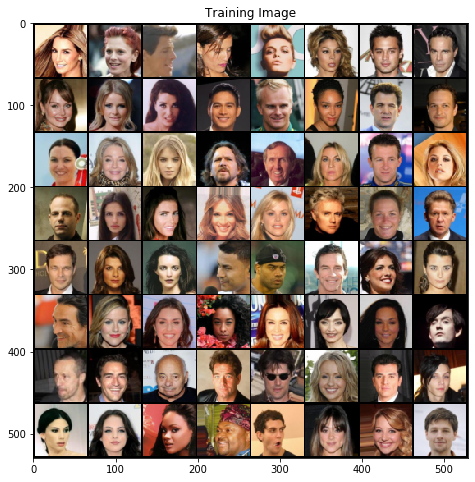

In [8]:
imshow(real_image)

![alt text](https://github.com/JeongJiHeon/GAN/blob/master/DCGAN.png)

#`Generator (UPSAMPLING)`
##-`ConvT Layer 1 - `
###--`input size = (BatchSize , 100, 1)`
###--`output size = (BatchSize, 512, 4, 4)`<br>

##-`ConvT Layer 2 - `
###--`input size = (BatchSize , 512, 4, 4)`
###--`output size = (BatchSize, 256, 8, 8)`<br>

##-`ConvT Layer 3 - `
###--`input size = (BatchSize , 256, 8, 8)`
###--`output size = (BatchSize, 128, 16, 16)`<br>

##-`ConvT Layer 4 - `
###--`input size = (BatchSize , 128, 16, 16)`
###--`output size = (BatchSize, 64, 32, 32)`<br>

##-`ConvT Layer 5 - `
###--`input size = (BatchSize, 64, 32, 32)`
###--`output size = (BatchSize, 3, 64, 64)`

In [42]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.G = nn.Sequential(
            nn.ConvTranspose2d(in_channels = 100, out_channels = 512, kernel_size = 4, stride = 1, padding = 0),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            
            nn.ConvTranspose2d(in_channels = 512, out_channels = 256, kernel_size = 4, stride = 2, padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            
            nn.ConvTranspose2d(in_channels = 256, out_channels = 128, kernel_size = 4, stride = 2, padding = 1),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            
            nn.ConvTranspose2d(in_channels = 128, out_channels = 64, kernel_size = 4, stride = 2, padding = 1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            
            nn.ConvTranspose2d(in_channels = 64, out_channels = 3, kernel_size = 4, stride = 2, padding = 1),
            nn.Tanh()
        )
        
    def forward(self, inputs):
        return self.G(inputs)
    
G = Generator()

-`Discriminator (DOWNSAMPLING)`
    - `Conv Layer 1 - `
        - input size = (BatchSize , 3, 64, 64)
        - output size = (BatchSize, 64, 32, 32)<br><br>
    - `Conv Layer 2 - `
        - input size = (BatchSize , 64, 32, 32)
        - output size = (BatchSize, 128, 16, 16)<br><br>
    - `Conv Layer 3 - `
        - input size = (BatchSize , 128, 16, 16)
        - output size = (BatchSize, 256, 8, 8)<br><br>
    -`Conv Layer 4 - `
        -input size = (BatchSize , 256, 8, 8)
        -output size = (BatchSize, 1)

In [43]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.D = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = 4, stride = 2, padding = 1),
            nn.LeakyReLU(0.2, inplace = True),
            
            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 4, stride = 2, padding = 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace = True),
            
            nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = 4, stride = 2, padding = 1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace = True),
            
            nn.Conv2d(in_channels = 256, out_channels = 1, kernel_size = 4, stride = 1, padding = 0),
            nn.Sigmoid()
            
        )
    def forward(self, inputs):
        return self.D(inputs)
    
D = Discriminator()